# Assignment Lab 4 - Nicolas Duboc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab4_functions import initinter41,rk4ODEinter41,derivsinter41,midpointinter41

# Problem Embedded

**Though the error estimate is for the embedded
fourth-order Runge-Kutta method, the fifth-order method can be used in
practice for calculating the solution, the assumption being the
fifth-order method should be at least as accurate as the fourth-order
method. In the demo below, compare solutions of the test problem**

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$

**generated by the fifth-order method with solutions generated by the
standard fourth-order Runge-Kutta method. Which method
is more accurate? Again, determine how the error decreases as you halve
the stepsizes.**

In [3]:
def RK5(coeffs,y,tstep,dt):
    k1 = dt * derivsinter41(coeff,y,tstep)
    k2 = dt * derivsinter41(coeff,y+((1/5)*k1),tstep+((1/5)*dt))
    k3 = dt * derivsinter41(coeff,y+((3/40)*k1)+((9/40)*k2),tstep+((3/10)*dt))
    k4 = dt * derivsinter41(coeff,y+((3/10)*k1)-((9/10)*k2)+((6/5)*k3),tstep+((3/5)*dt))
    k5 = dt * derivsinter41(coeff,y-((11/54)*k1)+((5/2)*k2)-((70/27)*k3)+((35/27)*k4),tstep+(dt))
    k6 = dt * derivsinter41(coeff,y+((1631/55296)*k1)+((175/512)*k2)+((575/13824)*k3)+((44275/110592)*k4)+((253/4096)*k5),tstep+((7/8)*dt))
    y_n1 = y +((37/378)*k1)+((250/621)*k3)+((125/594)*k4)+((512/1771)*k6)
    return y_n1

def rk4inter41 (coeff, y, theTime,dt):
  k1 = dt * derivsinter41(coeff,y,theTime)
  k2 = dt * derivsinter41(coeff,y + (0.5 * k1),theTime+0.5*dt)
  k3 = dt * derivsinter41(coeff,y + (0.5 * k2),theTime+0.5*dt)
  k4 = dt * derivsinter41(coeff,y +  k3,theTime+dt)
  yn1 = y + (1.0/6.0) * (k1 + (2.0 * k2) + (2.0 * k3) + k4)
  return yn1
    

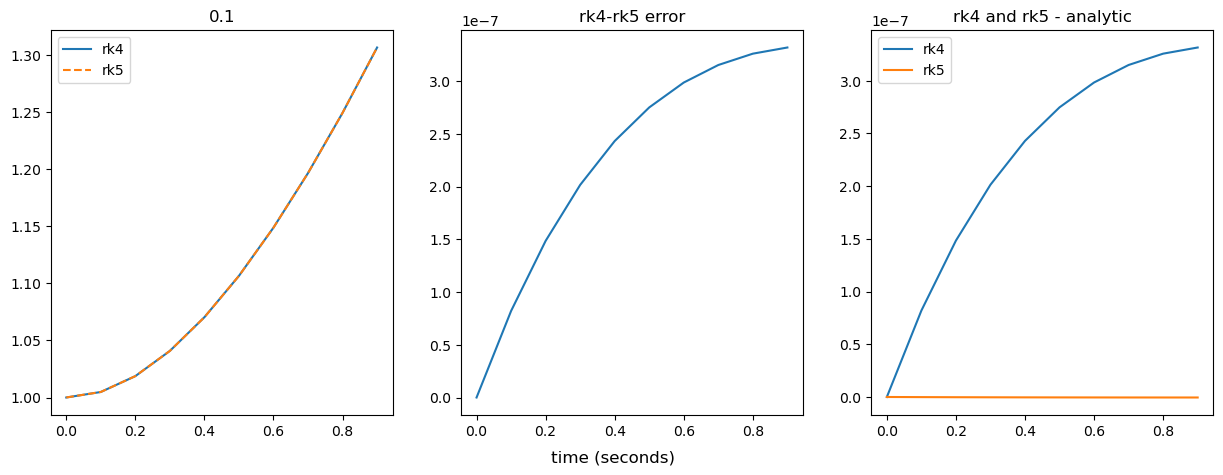

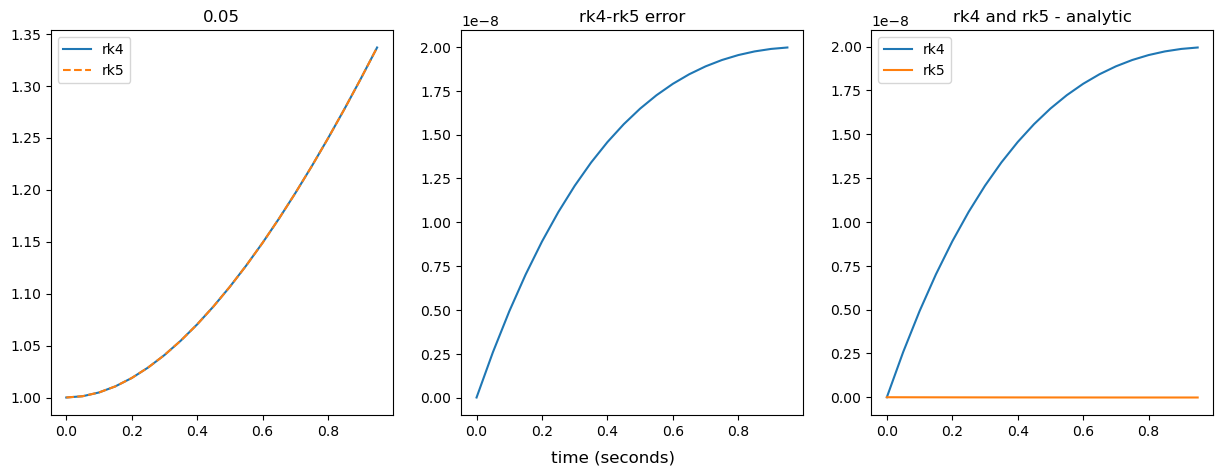

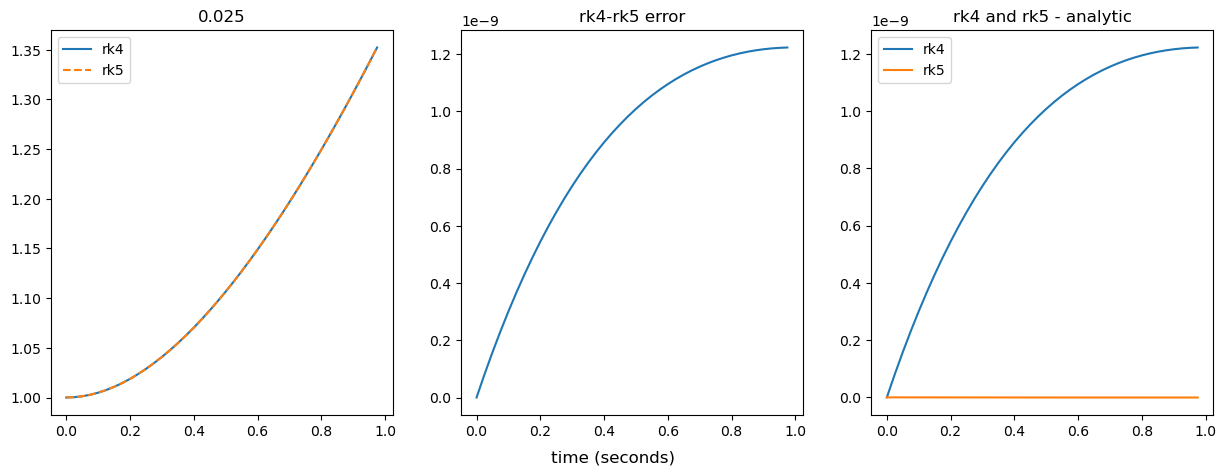

In [4]:
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.1,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

dt = [coeff.dt,coeff.dt*0.5,coeff.dt*0.25]
for i in range(len(dt)):
    yrk4 = []
    yrk5 = []
    yrk4.append(coeff.yinitial)
    yrk5.append(coeff.yinitial)
    timeVec = np.arange(coeff.t_beg,coeff.t_end,dt[i])
    nsteps = len(timeVec)
    for j in np.arange(1,nsteps):
        yrk4_new=rk4inter41(coeff,yrk4[j-1],timeVec[j-1],dt[i])
        yrk4.append(yrk4_new)
        yrk5_new=RK5(coeff,yrk5[j-1],timeVec[j-1],dt[i])
        yrk5.append(yrk5_new)
    # plot in i loop
    # add error
    # add error with analytic
    analytic = timeVec + np.exp(-timeVec)
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
    ax1.plot(timeVec,yrk4,'-',label='rk4')
    ax1.plot(timeVec,yrk5,'--',label='rk5')
    # ax1.set_xlabel('time (seconds)')
    ax1.legend(loc='best')
    ax1.set_title(dt[i])

    diff_est = np.subtract(yrk4,yrk5)
    ax2.plot(timeVec,diff_est)
    ax2.set_title('rk4-rk5 error')

    diff_yrk4 = np.subtract(yrk4,analytic)
    diff_yrk5 = np.subtract(yrk5,analytic)
    ax3.plot(timeVec,diff_yrk4,label='rk4')
    ax3.plot(timeVec,diff_yrk5,label='rk5')
    ax3.set_title('rk4 and rk5 - analytic')
    ax3.legend(loc='best')
    fig.supxlabel('time (seconds)')

The plots above show the difference in solutions with a reduced timestep (top to bottom) and the solution comparisons between rk4, rk5, and the analytic solution (left to right). The middle plots show the error between the rk5 and rk4. Though they seem to be exact when comparing solutions, there are minute differences between the two. This error is significantly reduced as you halve the step sizes. The plots in the far right show the difference between the rk4, rk5, and the analytic solution. The rk4 error is reduced as the stepsize is halved, however, the rk5 is the most accurate as it shows no difference when compared the analytic solution. This allows us to use rk5 as a "best guess" of our analytic solution. 

# Coding Problem B

**Now solve the following test equation by both the midpoint and Heun’s method and compare.**
    
$$f(y,t) = t - y  + 1.0$$ 
    
**Choose two sets of initial conditions and determine if there is any difference between the two methods when applied to either problem. Should there be? Explain by analyzing the steps that each method is taking.**

In [5]:
def HR(coeffs,y,nsteps):
    k1 = coeffs.dt*derivsinter41(coeffs,y,nsteps)
    k2 = coeffs.dt*derivsinter41(coeffs,y+((2/3)*k1),nsteps+((2/3)*coeffs.dt))
    y_n1 = y +(1/4)*k1 + (3/4)*k2
    return y_n1
    

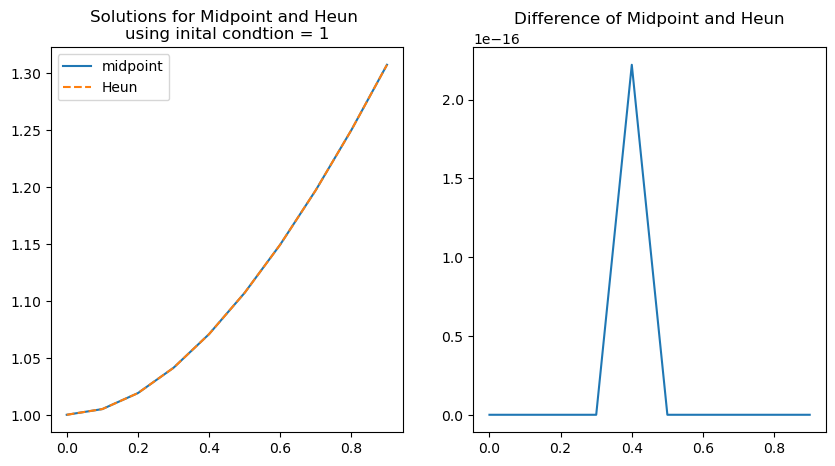

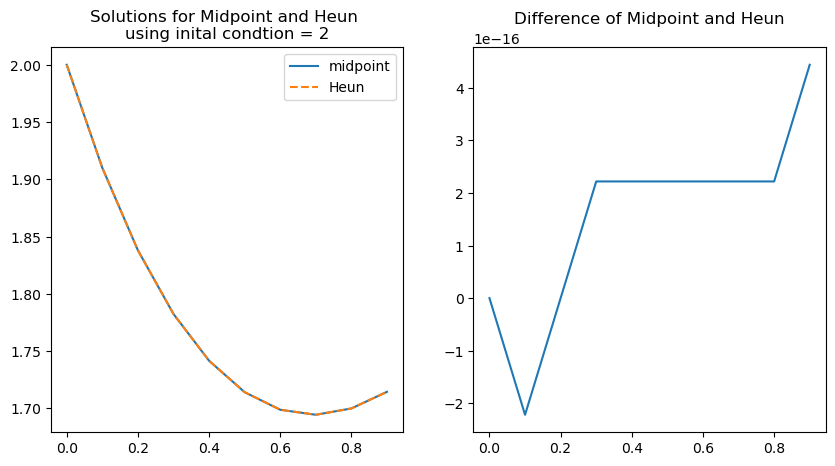

In [6]:
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
init_cond = [1,2]

analytic = timeVec + np.exp(-timeVec)

for i in range(len(init_cond)):
    ym = []
    yh = []
    ym.append(init_cond[i])
    yh.append(init_cond[i])
    for j in range(1,nsteps):
        ym_new = midpointinter41(coeff,ym[j-1],timeVec[j-1])
        ym.append(ym_new)
        yh_new = HR(coeff,yh[j-1],timeVec[j-1])
        yh.append(yh_new)
    #plot in i 
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    ax1.plot(timeVec,ym,label='midpoint')
    ax1.plot(timeVec,yh,linestyle='--',label='Heun')
    # ax1.plot(timeVec,analytic,label='analytic')
    ax1.legend(loc='best')
    ax1.set_title(f'Solutions for Midpoint and Heun \nusing inital condtion = {init_cond[i]}')
    
    diff_yh_ym = np.subtract(ym,yh)
    ax2.plot(timeVec,diff_yh_ym)
    ax2.set_title('Difference of Midpoint and Heun')

The plots above show the midpoint and Heun methods (left) with 2 sets of initial conditions. The plots on the right show the difference between both methods. There does not seem to be much of a difference between the 2 methods, with the exception of very small round-off errors at certain time steps. This makes sense, both methods are a version of an explicit 2-stage Runge-Kutta method that use slightly different variations in coefficients. Neverthless, both methods are considered to be second-order accurate.

# Problem Coding C

In [7]:
def deriv_temp(Temp,Ta,lam):
    # print(Temp)
    return -lam*(Temp - Ta)

def RK4(T,Ta,lam,dt):
    k1 = dt * deriv_temp(T,Ta,lam)
    k2 = dt * deriv_temp(T+ (0.5 * k1),Ta,lam)
    k3 = dt * deriv_temp(T+ (0.5 * k2),Ta,lam)
    k4 = dt * deriv_temp(T+ k3,Ta,lam)
    Tn1 = T + (1.0/6.0) * (k1 + (2.0 * k2) + (2.0 * k3) + k4)
    return Tn1

[40.         41.66574135 43.47021742 45.42498301 47.54255529 49.83649395
 52.32148804 55.01345001 57.92961759 61.08866421]
[30.         30.83287068 31.73510871 32.7124915  33.77127764 34.91824698
 36.16074402 37.506725   38.96480879 40.54433211]


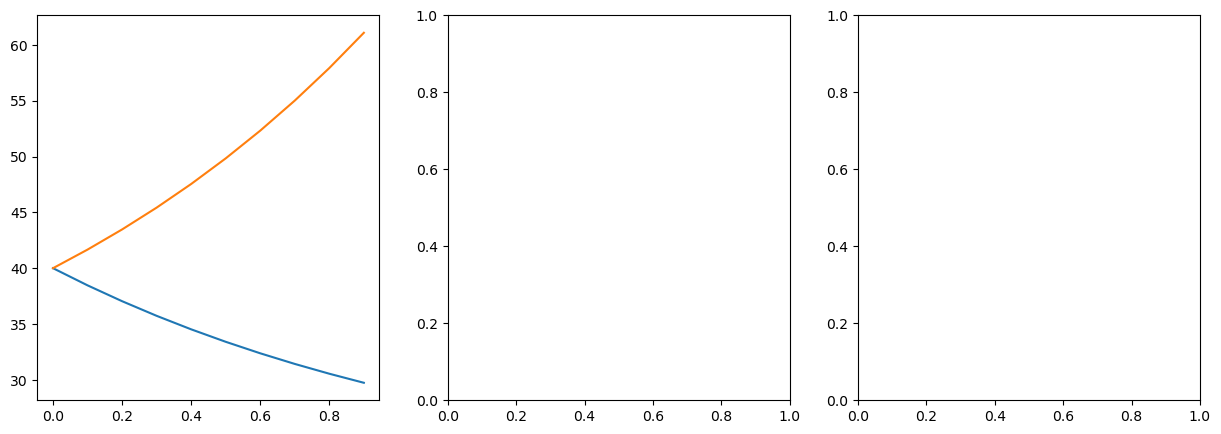

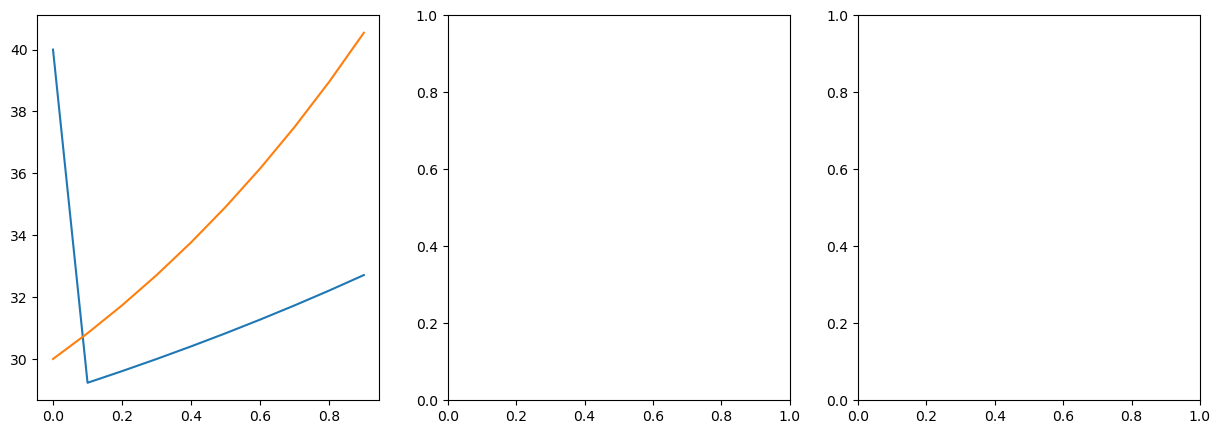

In [9]:
Ta = 20
T0 = [40,30]
lam = [0.8,-0.4]
dt = 0.1
timeVec = np.arange(0,1,dt)
nstep = len(timeVec)

# deriv_temp(T[0],Ta,lam)
# 6 plots, same T0, different lam for each set of 3
T = np.empty(shape=(len(T0),nstep))
analytic = np.empty_like(T)

for i in range(len(T0)):
    T[i,0] = T0[i]
    for j in range(1,nstep):
        Tn0 = RK4(T[i,j-1],Ta,lam[0],dt)
        Tn1 = RK4(T[i,j-1],Ta,lam[1],dt)
        #Tn2 = RK4(T[i,j-1],Ta,lam[2],dt)
        T[0,j] = Tn0
        T[1,j] = Tn1
        #T[2,j] = Tn2
    analytic[0,:] = Ta + (T0[i]-Ta)*np.exp(lam[0]*timeVec)
    print(analytic[0,:])
    #analytic[1,:] = Ta + (T0[i]-Ta)*np.exp(lam[1]*timeVec)
    #analytic[2,:] = Ta + (T0[i]-Ta)*np.exp(lam[2]*timeVec)
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
    ax1.plot(timeVec,T[0,:])
    ax1.plot(timeVec,analytic[0,:])
    
    #ax2.plot(timeVec,T[1,:])
    #ax2.plot(timeVec,analytic[1,:])

    #ax3.plot(timeVec,T[2,:])
    #ax3.plot(timeVec,analytic[2,:])

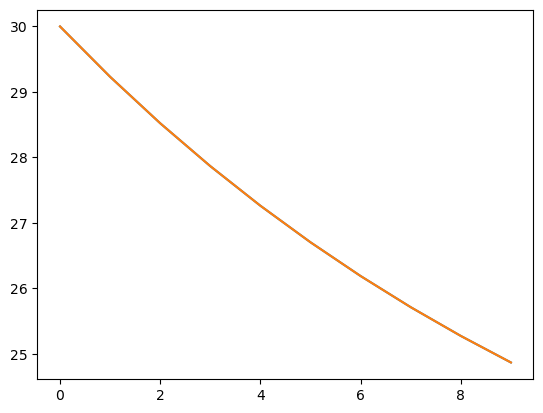

In [47]:
Ta = 20
T0 = [40,30]
lam = -0.8
dt = 0.1
timeVec = np.arange(0,1,dt)
nstep = len(timeVec)

# deriv_temp(T[0],Ta,lam)
# 6 plots, same T0, different lam for each set of 3
T1 = []
T2 = []
T1.append(T0[0])
T2.append(T0[1])
for i in range(1,nstep):
    Tn1 = RK4(T1[i-1],Ta,lam,dt)
    Tn2 = RK4(T2[i-1],Ta,lam,dt)

fig, (ax1,ax2) = plt.sublots(1,2,figsize=(10,5))


for j in range(1,nstep):
    Tn0 = RK4(T[i,j-1],Ta,lam[0],dt)
    Tn1 = RK4(T[i,j-1],Ta,lam[1],dt)
    analytic[0,:] = Ta + (T0[i]-Ta)*np.exp(lam[0]*timeVec)
    print(analytic[0,:])
    #analytic[1,:] = Ta + (T0[i]-Ta)*np.exp(lam[1]*timeVec)
    #analytic[2,:] = Ta + (T0[i]-Ta)*np.exp(lam[2]*timeVec)
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
    ax1.plot(timeVec,T[0,:])
    ax1.plot(timeVec,analytic[0,:])
    
    #ax2.plot(timeVec,T[1,:])
    #ax2.plot(timeVec,analytic[1,:])

    #ax3.plot(timeVec,T[2,:])
    #ax3.plot(timeVec,analytic[2,:])